# **PROJECT TITLE: "E-COMMERCE PRODUCT RECOMMENDATION SYSTEM"**

### ---------------------------------------_PROBLEM STATEMENT_---------------------------------------------- 
- E-Commerce platforms need scalable,accurate product recommendations to boost user engagement,repeat purchases and basket value

- *Goal:* shopping experience using collaborative filtering to suggest relevant products to each user

##### ----------------------------------------------------*DATA LOADING*-----------------------------------------------------------------

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
data=pd.read_csv('product_recommendation_dataset.csv')
data.head(5)

,User_ID,Product_ID,Category,Rating,Timestamp,User_Location,Product_Price,Company_Name,Device_Type,Payment_Method,Delivery_Status,Review_Text
0,U00655,P00058,Electronics,3.0,2023-04-13,Houston,115.49,Flipkart,Tablet,Cash on Delivery,Delivered,Poor packaging
1,U00433,P00017,Electronics,1.0,2023-12-15,Houston,120.17,Amazon,Tablet,Debit Card,Returned,Not satisfied
2,U00460,P00302,Home,1.0,2023-09-28,Chicago,350.58,Target,Desktop,Debit Card,In Transit,Excellent quality
3,U00105,P00048,Toys,1.0,2023-04-17,Philadelphia,424.51,Walmart,Mobile,Net Banking,Delivered,Value for money
4,U00081,P00283,Home,5.0,2023-03-13,Philadelphia,290.79,Flipkart,Mobile,Debit Card,Cancelled,Good product


In [33]:
df=data.copy()
df.head()

,User_ID,Product_ID,Category,Rating,Timestamp,User_Location,Product_Price,Company_Name,Device_Type,Payment_Method,Delivery_Status,Review_Text
0,U00655,P00058,Electronics,3.0,2023-04-13,Houston,115.49,Flipkart,Tablet,Cash on Delivery,Delivered,Poor packaging
1,U00433,P00017,Electronics,1.0,2023-12-15,Houston,120.17,Amazon,Tablet,Debit Card,Returned,Not satisfied
2,U00460,P00302,Home,1.0,2023-09-28,Chicago,350.58,Target,Desktop,Debit Card,In Transit,Excellent quality
3,U00105,P00048,Toys,1.0,2023-04-17,Philadelphia,424.51,Walmart,Mobile,Net Banking,Delivered,Value for money
4,U00081,P00283,Home,5.0,2023-03-13,Philadelphia,290.79,Flipkart,Mobile,Debit Card,Cancelled,Good product


In [34]:
print(df.shape)

(50500, 12)


*KEY FINDINGS*:-
- rows:50500
- columns:12

In [35]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50500 entries, 0 to 50499
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   User_ID          50500 non-null  object 
 1   Product_ID       50500 non-null  object 
 2   Category         50500 non-null  object 
 3   Rating           49488 non-null  float64
 4   Timestamp        50500 non-null  object 
 5   User_Location    49483 non-null  object 
 6   Product_Price    50500 non-null  float64
 7   Company_Name     50500 non-null  object 
 8   Device_Type      50500 non-null  object 
 9   Payment_Method   49489 non-null  object 
 10  Delivery_Status  50500 non-null  object 
 11  Review_Text      49491 non-null  object 
dtypes: float64(2), object(10)
memory usage: 4.6+ MB
None


*KEY FINDINGS*:-
- Rating,User_Location,Payment_Method,Review_Text has missing values.
- Timestamp wrong dtype

In [36]:
print(df.isnull().sum())

User_ID               0
Product_ID            0
Category              0
Rating             1012
Timestamp             0
User_Location      1017
Product_Price         0
Company_Name          0
Device_Type           0
Payment_Method     1011
Delivery_Status       0
Review_Text        1009
dtype: int64


#### ----------------------------------------------------*DATA CLEANING*--------------------------------------------------------

In [37]:
df.columns

Index(['User_ID', 'Product_ID', 'Category', 'Rating', 'Timestamp',
       'User_Location', 'Product_Price', 'Company_Name', 'Device_Type',
       'Payment_Method', 'Delivery_Status', 'Review_Text'],
      dtype='object')

In [38]:
df['Timestamp']=pd.to_datetime(df['Timestamp'],errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50500 entries, 0 to 50499
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   User_ID          50500 non-null  object        
 1   Product_ID       50500 non-null  object        
 2   Category         50500 non-null  object        
 3   Rating           49488 non-null  float64       
 4   Timestamp        50500 non-null  datetime64[ns]
 5   User_Location    49483 non-null  object        
 6   Product_Price    50500 non-null  float64       
 7   Company_Name     50500 non-null  object        
 8   Device_Type      50500 non-null  object        
 9   Payment_Method   49489 non-null  object        
 10  Delivery_Status  50500 non-null  object        
 11  Review_Text      49491 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(9)
memory usage: 4.6+ MB


In [39]:
null_percent=(df.isnull().sum()/len(df))*100
print(null_percent)

User_ID            0.000000
Product_ID         0.000000
Category           0.000000
Rating             2.003960
Timestamp          0.000000
User_Location      2.013861
Product_Price      0.000000
Company_Name       0.000000
Device_Type        0.000000
Payment_Method     2.001980
Delivery_Status    0.000000
Review_Text        1.998020
dtype: float64


- Before dropping the col/rows its better to check the null percentage of missing data ,its 2% only so data quality isn't going to affect

In [40]:
df.describe(include="object")

,User_ID,Product_ID,Category,User_Location,Company_Name,Device_Type,Payment_Method,Delivery_Status,Review_Text
count,50500,50500,50500,49483,50500,50500,49489,50500,49491
unique,1000,500,8,9,9,3,5,4,6
top,U00629,P00073,Toys,Philadelphia,Walmart,Mobile,UPI,Delivered,Value for money
freq,75,133,6382,5611,5774,16944,9958,12792,8298


In [41]:
df.describe()

,Rating,Timestamp,Product_Price
count,49488.000000,50500,50500.000000
mean,2.993493,2023-07-01 00:49:31.817821952,252.421260
min,1.000000,2023-01-01 00:00:00,5.020000
25%,2.000000,2023-03-31 00:00:00,129.337500
50%,3.000000,2023-07-01 00:00:00,252.695000
75%,4.000000,2023-09-30 00:00:00,375.442500
max,5.000000,2023-12-31 00:00:00,499.980000
std,1.414270,NaN,142.172915


- Filling missing values :

In [42]:
df['User_Location'].value_counts()

User_Location
Philadelphia    5611
New York        5597
Los Angeles     5505
Phoenix         5501
Chicago         5500
Bangalore       5474
Mumbai          5471
Houston         5414
Delhi           5410
Name: count, dtype: int64

In [43]:
location=df['User_Location'].mode()
print(location)

0    Philadelphia
Name: User_Location, dtype: object


In [44]:
df['User_Location']=df['User_Location'].fillna("Philadelphia")
df['User_Location'].isna().sum()

np.int64(0)

In [45]:
df['Payment_Method']=df['Payment_Method'].fillna('Nopay')
df['Payment_Method'].isna().sum()

np.int64(0)

In [46]:
df['Review_Text']=df['Review_Text'].fillna("Noreview")
df['Review_Text'].isna().sum()

np.int64(0)

In [47]:
df['Rating']=df['Rating'].fillna(df['Rating'].median())
df['Rating'].isna().sum()

np.int64(0)

In [48]:
df.isnull().sum()

User_ID            0
Product_ID         0
Category           0
Rating             0
Timestamp          0
User_Location      0
Product_Price      0
Company_Name       0
Device_Type        0
Payment_Method     0
Delivery_Status    0
Review_Text        0
dtype: int64

In [49]:
df.duplicated().sum()

np.int64(500)

In [50]:
df.drop_duplicates(inplace=True)

In [51]:
df.shape

(50000, 12)

*DATA CLEANED*

## --------------------**EXPLORATORY DATA ANALYSIS**-------------------------

#### *UNIVARIATE ANALYSIS*

In [52]:
df.describe()

,Rating,Timestamp,Product_Price
count,50000.000000,50000,50000.000000
mean,2.994520,2023-07-01 02:02:32.640000,252.490696
min,1.000000,2023-01-01 00:00:00,5.020000
25%,2.000000,2023-03-31 00:00:00,129.360000
50%,3.000000,2023-07-01 00:00:00,252.870000
75%,4.000000,2023-09-30 00:00:00,375.482500
max,5.000000,2023-12-31 00:00:00,499.980000
std,1.399803,NaN,142.182996


In [53]:
sns.set_style("whitegrid")

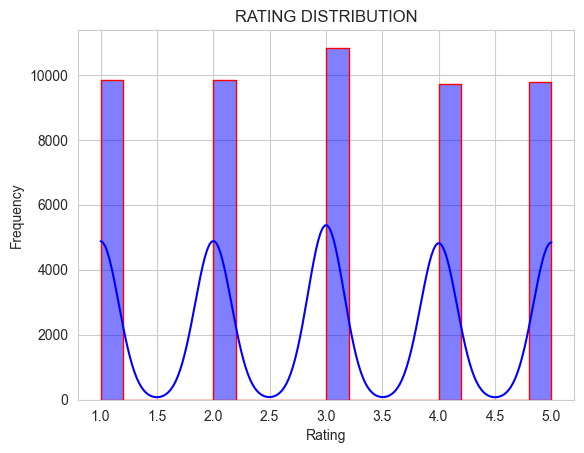

In [54]:
#rating distribution
sns.histplot(df['Rating'],bins=20,kde=True,edgecolor='red',color='blue')
plt.title("RATING DISTRIBUTION")
plt.xlabel('Rating')
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

- Most ratings are concentrated at values 1 to 5 showing users prefer whole no. ratings
- Distribution is balanced,no major outliers

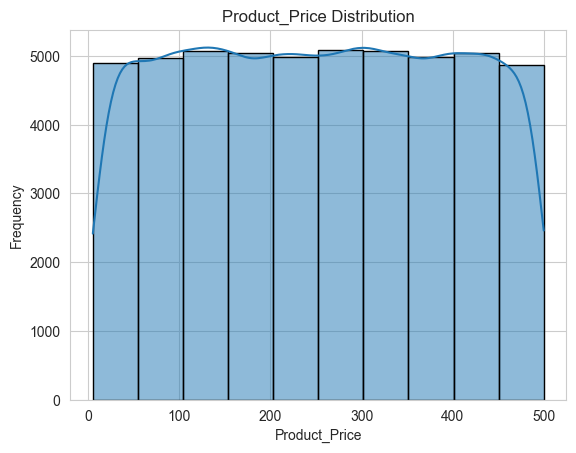

In [55]:
#Product_Price distribution
sns.histplot(df['Product_Price'],bins=10,kde=True,edgecolor='black')
plt.title("Product_Price Distribution")
plt.xlabel('Product_Price')
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

- Product prices are evenly distributed between 0 and 500 with no significant spikes or gaps
- Data is uniformly spread

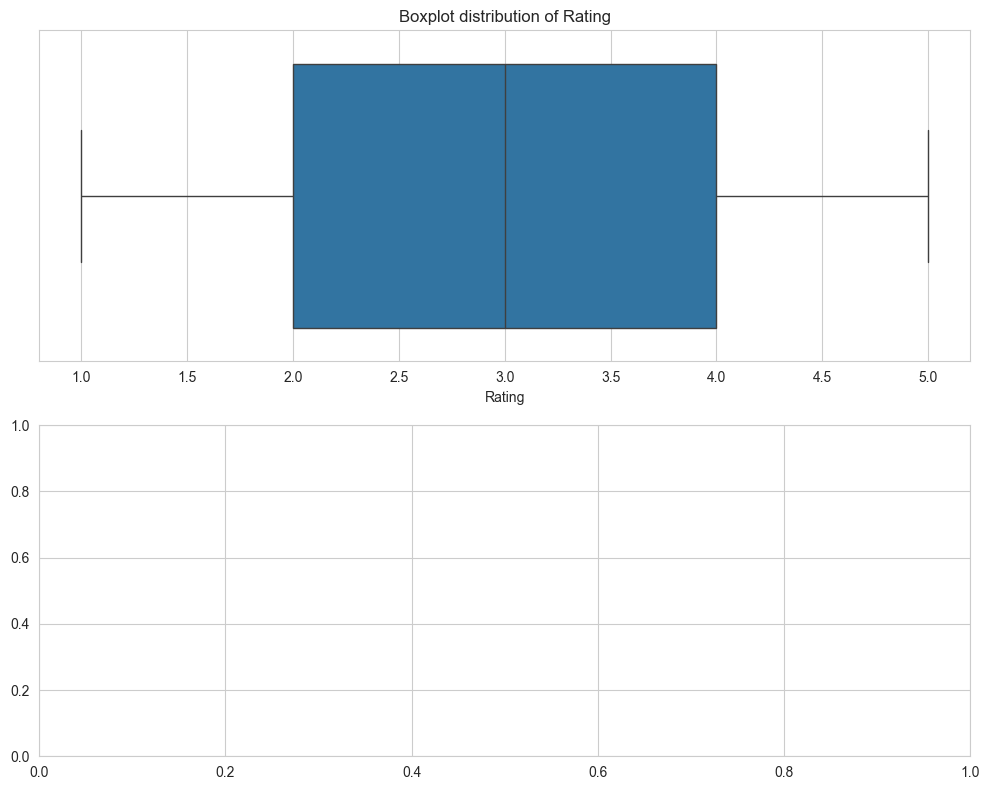

<Figure size 640x480 with 0 Axes>

In [56]:
num_col=['Rating','Product_Price']
fig,axes=plt.subplots(len(num_col),1,figsize=(10,4*len(num_col)))
for i,col in enumerate(num_col):
    sns.boxplot(x=df[col],ax=axes[i])
    axes[i].set_title(f'Boxplot distribution of {col}')
    axes[i].set_xlabel(col.capitalize())
    plt.tight_layout()
    plt.show()

In [57]:
df.describe(include='object')

,User_ID,Product_ID,Category,User_Location,Company_Name,Device_Type,Payment_Method,Delivery_Status,Review_Text
count,50000,50000,50000,50000,50000,50000,50000,50000,50000
unique,1000,500,8,9,9,3,6,4,7
top,U00629,P00073,Toys,Philadelphia,Walmart,Mobile,UPI,Delivered,Good product
freq,75,133,6310,6547,5719,16777,9852,12659,8223


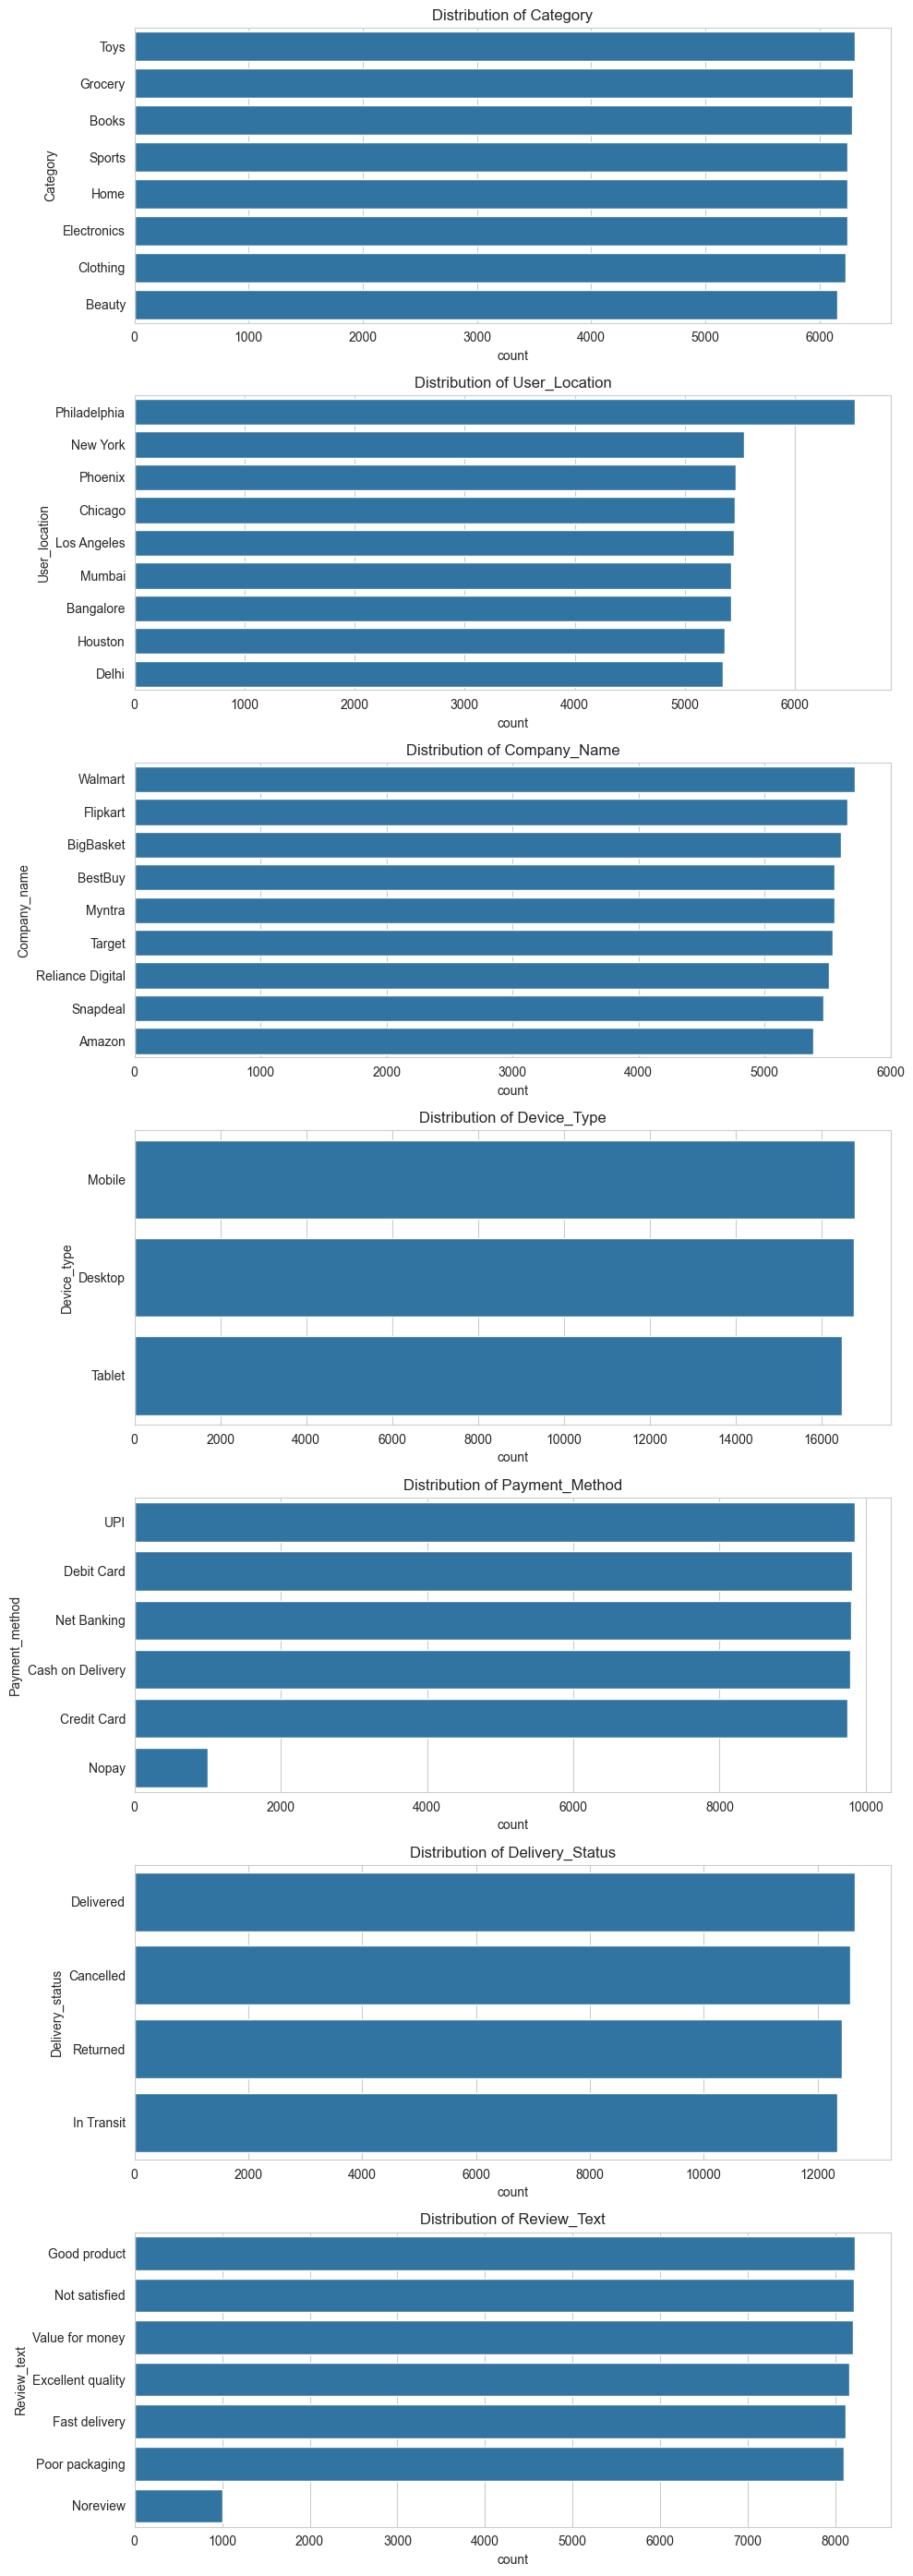

In [58]:
#categorical univariate analysis
col_name=["Category","User_Location","Company_Name","Device_Type","Payment_Method","Delivery_Status","Review_Text"]
#create subplots
fig,axes=plt.subplots(len(col_name),1,figsize=(10,4 * len(col_name)))
#loop for every column
for i,col in enumerate(col_name):
    sns.countplot(data=df,y=col,ax=axes[i],order=df[col].value_counts().index)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel("count")
    axes[i].set_ylabel(col.capitalize())

#adjust layout
plt.tight_layout()
plt.show()

# **BIVARIATE ANALYSIS**

#### - *NUMERICAL VS NUMERICAL DATA*

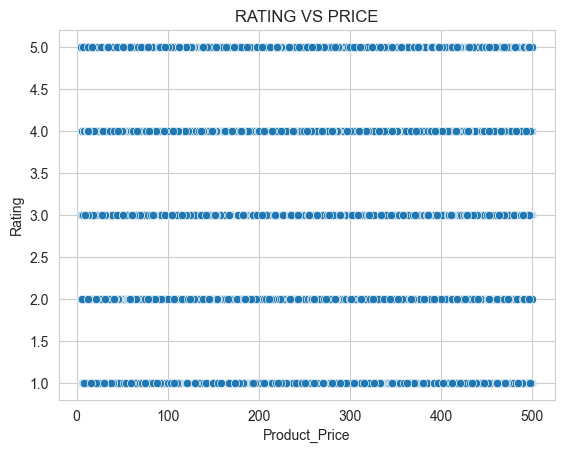

In [59]:
#RATING VS PRODUCT_PRICE
plt.Figure(figsize=(10,8))
sns.scatterplot(data=df,x='Product_Price',y='Rating')
plt.title("RATING VS PRICE")
plt.show()

#### - *NUMERICAL VS CATEGORICAL DATA*

In [60]:
df.describe(include='object')

,User_ID,Product_ID,Category,User_Location,Company_Name,Device_Type,Payment_Method,Delivery_Status,Review_Text
count,50000,50000,50000,50000,50000,50000,50000,50000,50000
unique,1000,500,8,9,9,3,6,4,7
top,U00629,P00073,Toys,Philadelphia,Walmart,Mobile,UPI,Delivered,Good product
freq,75,133,6310,6547,5719,16777,9852,12659,8223


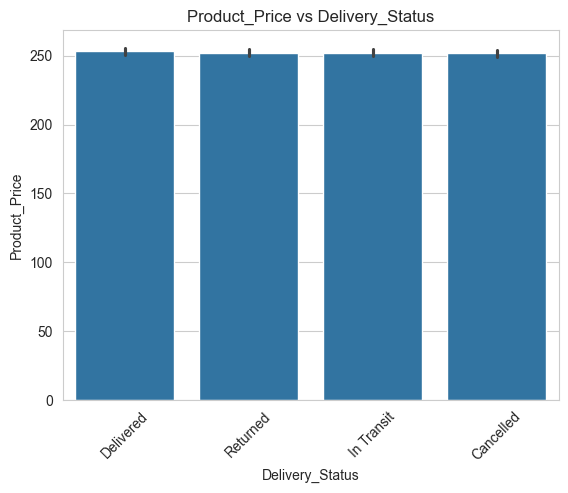

In [61]:
#PRICE VS Delivery_Status
sns.barplot(data=df,x='Delivery_Status',y='Product_Price')
plt.title("Product_Price vs Delivery_Status")
plt.xticks(rotation=45)
plt.show()

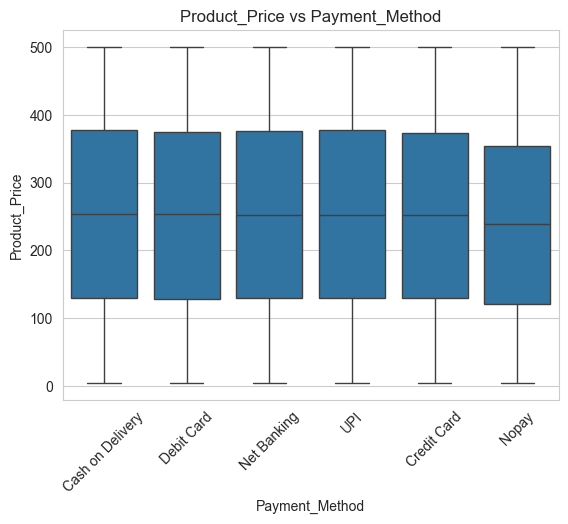

In [62]:
#PRICE VS Payment_Method
sns.boxplot(data=df,x='Payment_Method',y='Product_Price')
plt.title("Product_Price vs Payment_Method")
plt.xticks(rotation=45)
plt.show()

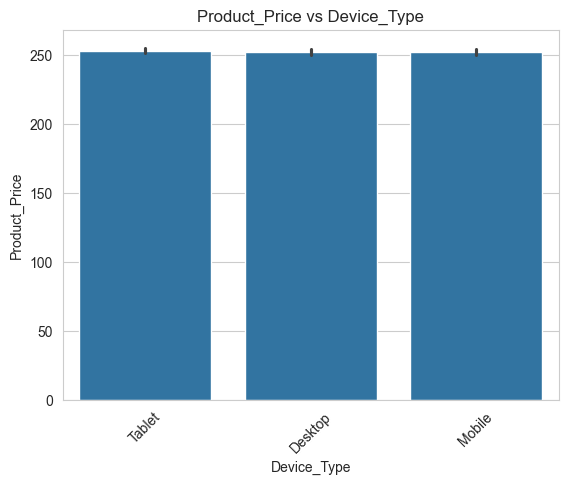

In [63]:
#PRICE VS Device_Type
sns.barplot(data=df,x='Device_Type',y='Product_Price')
plt.title("Product_Price vs Device_Type")
plt.xticks(rotation=45)
plt.show()

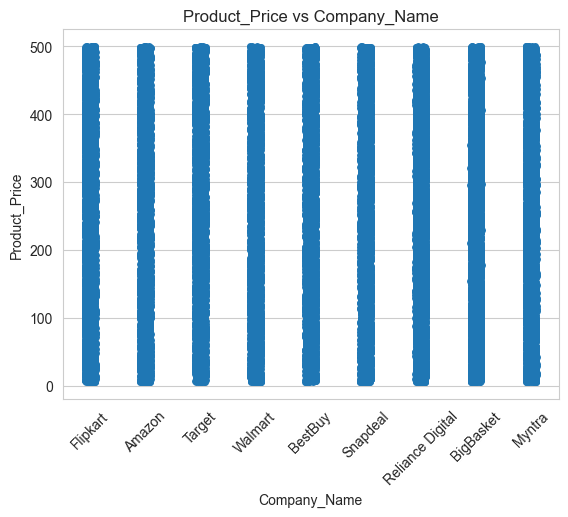

In [64]:
#PRICE VS Company_Name
sns.stripplot(data=df,x='Company_Name',y='Product_Price',jitter=True)
plt.title("Product_Price vs Company_Name")
plt.xticks(rotation=45)
plt.show()

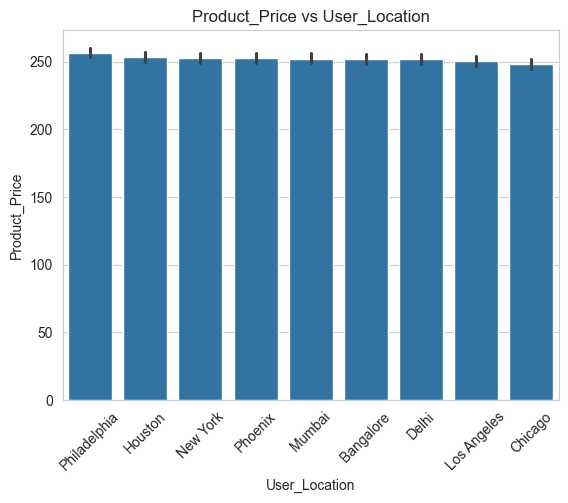

In [65]:
#PRICE VS User_Location
sns.barplot(data=df,x='User_Location',y='Product_Price',order=df.groupby('User_Location')['Product_Price'].mean().sort_values(ascending=False).index[:10])
plt.title("Product_Price vs User_Location")
plt.xticks(rotation=45)
plt.show()

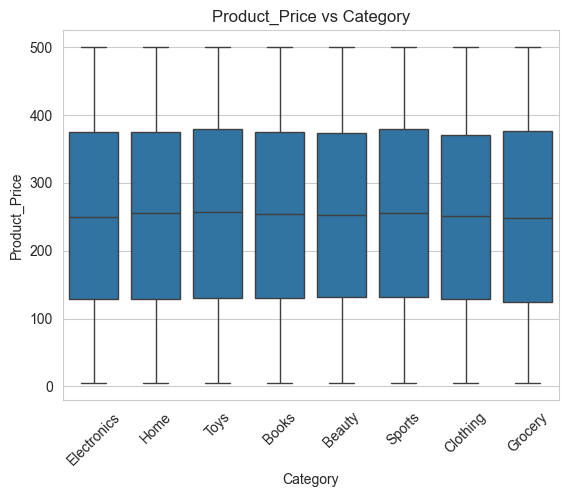

In [66]:
#PRICE VS CAT
sns.boxplot(data=df,x='Category',y='Product_Price')
plt.title("Product_Price vs Category")
plt.xticks(rotation=45)
plt.show()

#### CAT VS CAT

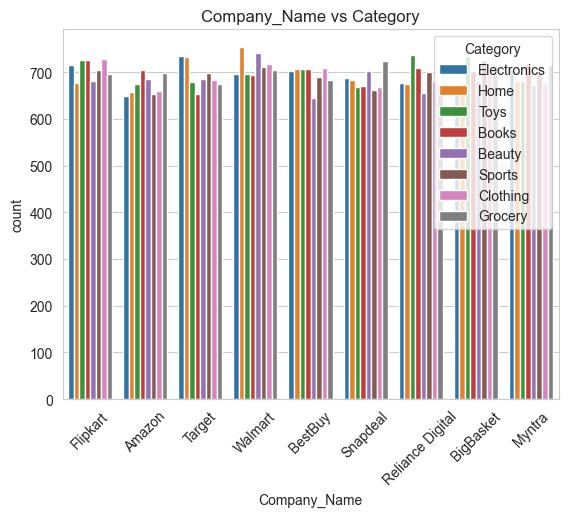

In [67]:
#Company_Name VS HUE(DEVICE,DELIVERY,payment)
sns.countplot(data=df,x='Company_Name',hue='Category')
plt.title("Company_Name vs Category")
plt.xticks(rotation=45)
plt.show()

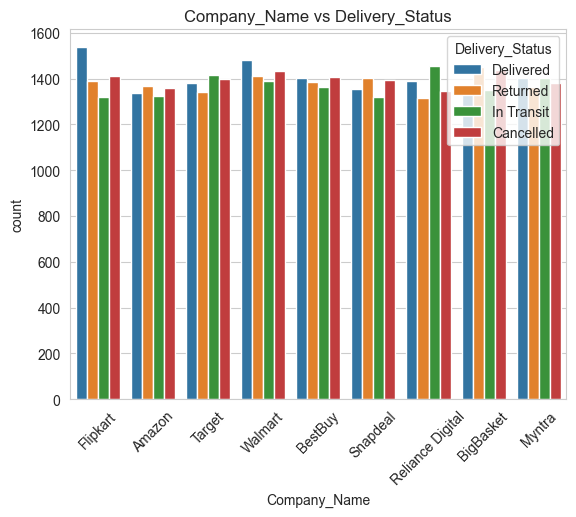

In [68]:
#Company_Name VS HUE(DEVICE,DELIVERY,payment)
sns.countplot(data=df,x='Company_Name',hue='Delivery_Status')
plt.title("Company_Name vs Delivery_Status")
plt.xticks(rotation=45)
plt.show()

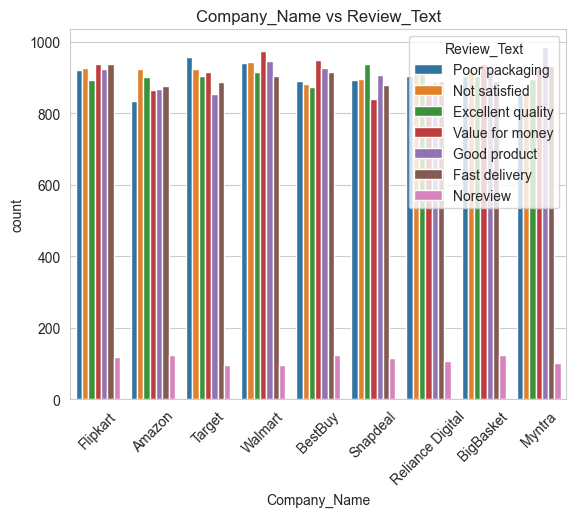

In [69]:
#Company_Name VS HUE(DEVICE,DELIVERY,payment)
sns.countplot(data=df,x='Company_Name',hue='Review_Text')
plt.title("Company_Name vs Review_Text")
plt.xticks(rotation=45)
plt.show()

In [70]:
df['Review_Text'].unique()

array(['Poor packaging', 'Not satisfied', 'Excellent quality',
       'Value for money', 'Good product', 'Fast delivery', 'Noreview'],
      dtype=object)

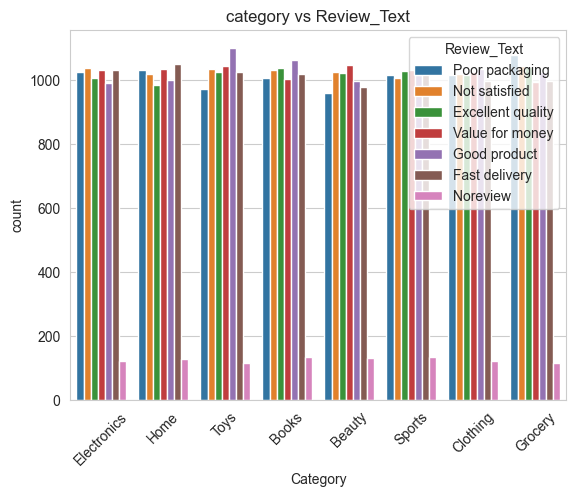

In [71]:
#CAT VS HUE(DEVICE,DELIVERY,payment)
sns.countplot(data=df,x='Category',hue='Review_Text')
plt.title("category vs Review_Text")
plt.xticks(rotation=45)
plt.show()

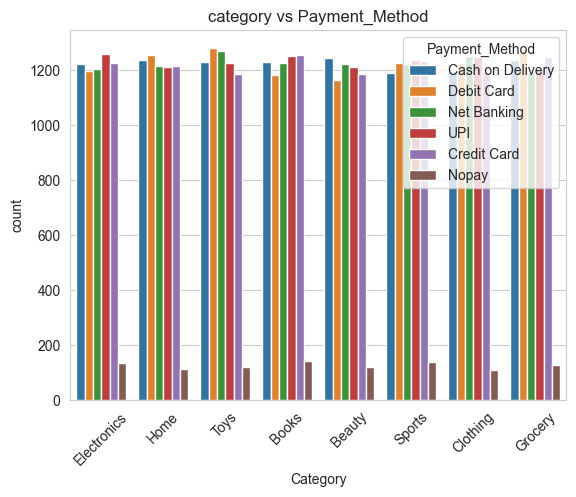

In [72]:
#CAT VS HUE(DEVICE,DELIVERY,payment)
sns.countplot(data=df,x='Category',hue='Payment_Method')
plt.title("category vs Payment_Method")
plt.xticks(rotation=45)
plt.show()

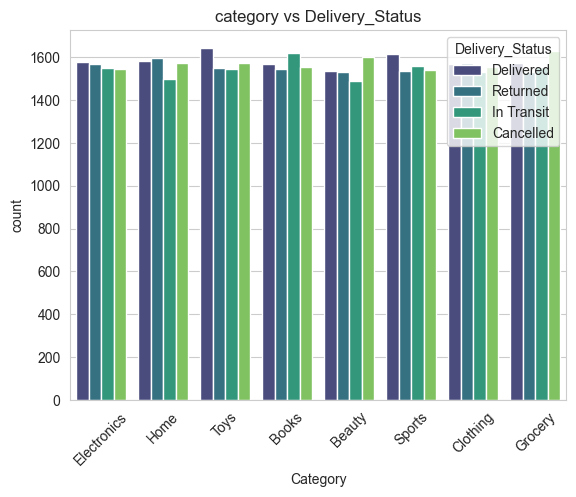

In [73]:
#CAT VS HUE(DEVICE,DELIVERY)
plt.Figure(figsize=(12,6))
sns.countplot(data=df,x='Category',hue='Delivery_Status',palette='viridis')
plt.title("category vs Delivery_Status")
plt.xticks(rotation=45)
plt.show()

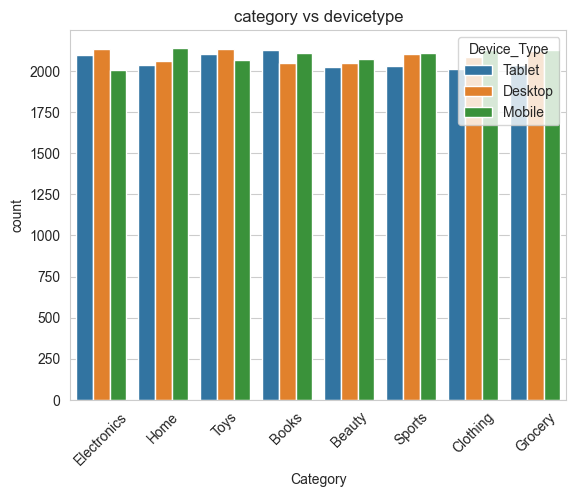

In [74]:
#CAT VS HUE(DEVICE,DELIVERY)
sns.countplot(data=df,x='Category',hue='Device_Type')
plt.title("category vs devicetype")
plt.xticks(rotation=45)
plt.show()

### NUM VS CAT

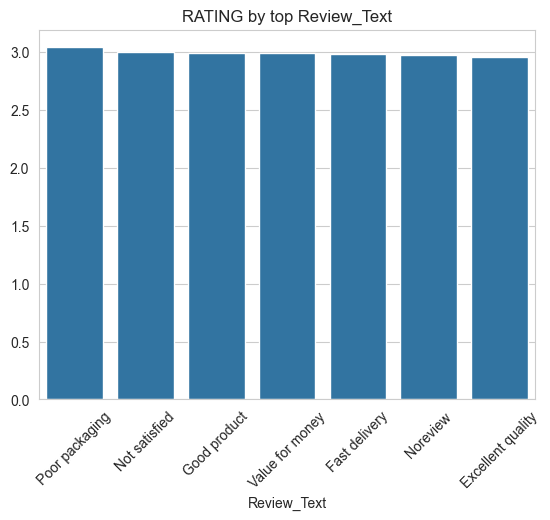

In [76]:
#RATING VS Review_Text
loc_rat=df.groupby('Review_Text')['Rating'].mean().sort_values(ascending=False).head(10)
plt.Figure(figsize=(10,8))
sns.barplot(x=loc_rat.index,y=loc_rat.values)
plt.xticks(rotation=45)
plt.title("RATING by top Review_Text")
plt.show()

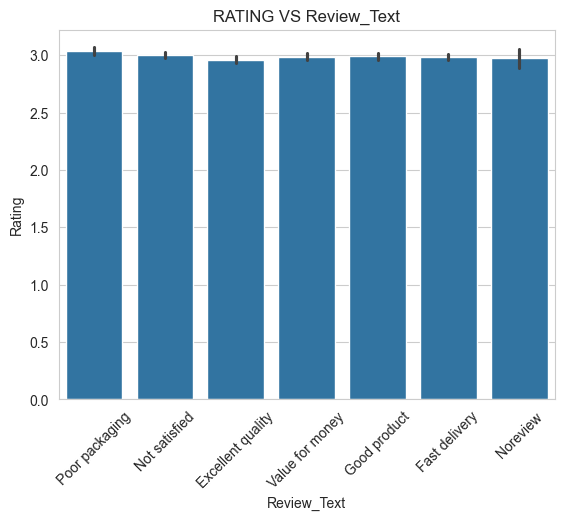

In [77]:
#RATING VS Review_Text
plt.Figure(figsize=(10,8))
sns.barplot(data=df,x='Review_Text',y='Rating')
plt.xticks(rotation=45)
plt.title("RATING VS Review_Text")
plt.show()

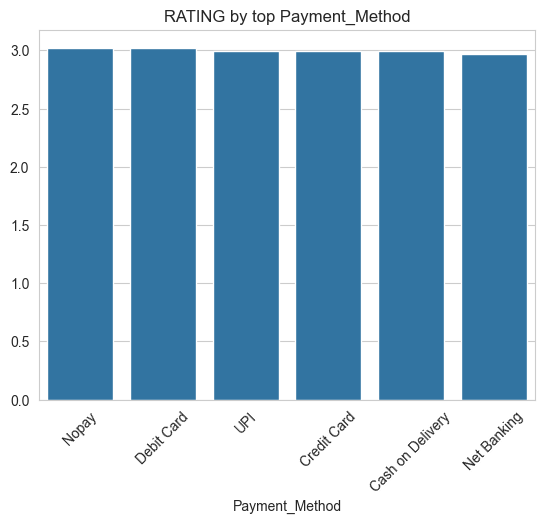

In [78]:
#RATING VS Payment_Method
loc_rat=df.groupby('Payment_Method')['Rating'].mean().sort_values(ascending=False).head(10)
plt.Figure(figsize=(10,8))
sns.barplot(x=loc_rat.index,y=loc_rat.values)
plt.xticks(rotation=45)
plt.title("RATING by top Payment_Method")
plt.show()

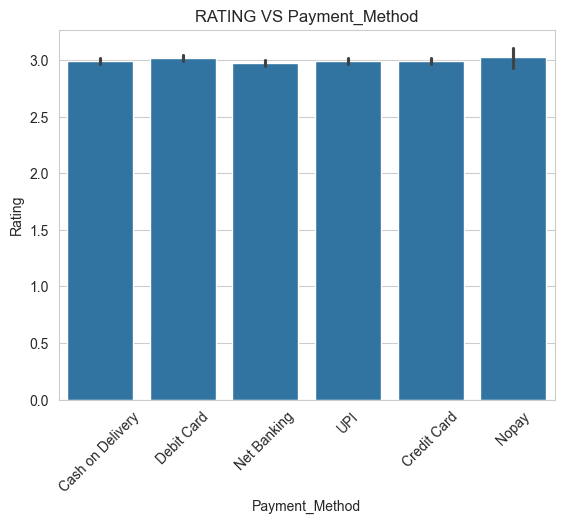

In [79]:
#RATING VS Payment_Method
plt.Figure(figsize=(10,8))
sns.barplot(data=df,x='Payment_Method',y='Rating')
plt.xticks(rotation=45)
plt.title("RATING VS Payment_Method")
plt.show()

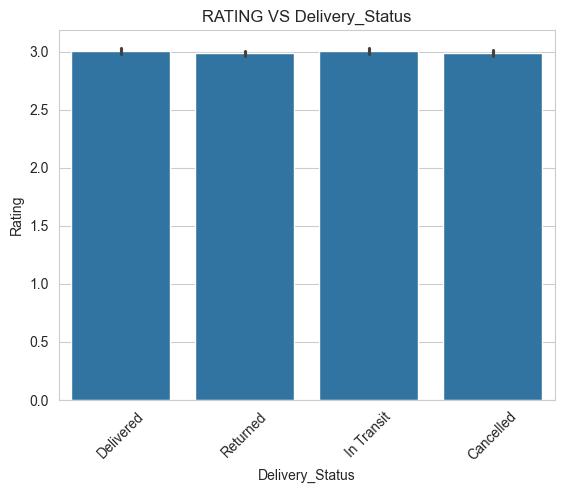

In [80]:
#RATING VS Delivery_Status
plt.Figure(figsize=(10,8))
sns.barplot(data=df,x='Delivery_Status',y='Rating')
plt.xticks(rotation=45)
plt.title("RATING VS Delivery_Status")
plt.show()

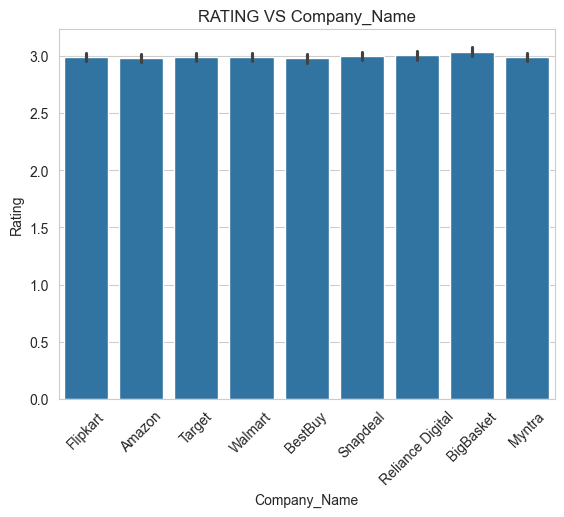

In [81]:
#RATING VS Company_Name
plt.Figure(figsize=(10,8))
sns.barplot(data=df,x='Company_Name',y='Rating')
plt.xticks(rotation=45)
plt.title("RATING VS Company_Name")
plt.show()

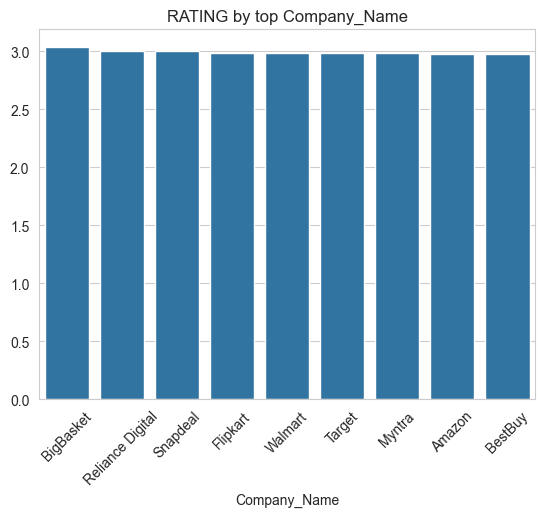

In [82]:
#RATING VS Company_Name
loc_rat=df.groupby('Company_Name')['Rating'].mean().sort_values(ascending=False).head(10)
plt.Figure(figsize=(10,8))
sns.barplot(x=loc_rat.index,y=loc_rat.values)
plt.xticks(rotation=45)
plt.title("RATING by top Company_Name")
plt.show()

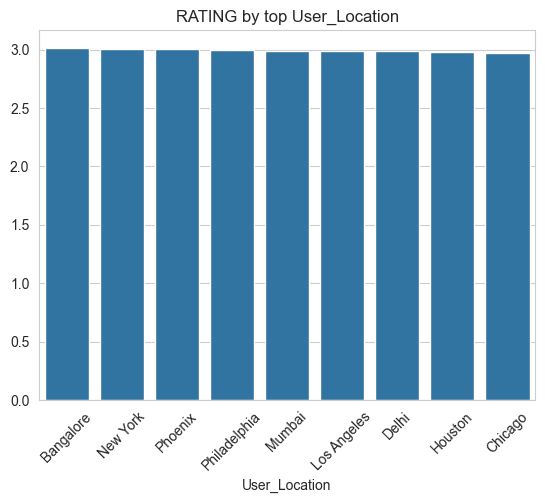

In [83]:
#RATING VS User_Location
loc_rat=df.groupby('User_Location')['Rating'].mean().sort_values(ascending=False).head(10)
plt.Figure(figsize=(10,8))
sns.barplot(x=loc_rat.index,y=loc_rat.values)
plt.xticks(rotation=45)
plt.title("RATING by top User_Location")
plt.show()

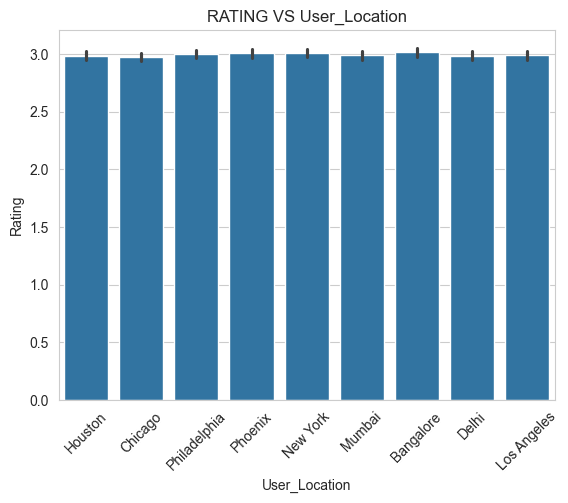

In [84]:
#RATING VS User_Location
plt.Figure(figsize=(10,8))
sns.barplot(data=df,x='User_Location',y='Rating')
plt.xticks(rotation=45)
plt.title("RATING VS User_Location")
plt.show()

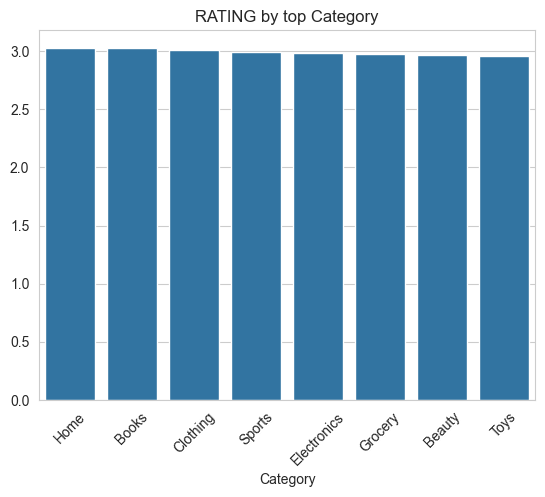

In [85]:
#RATING VS Category
loc_rat=df.groupby('Category')['Rating'].mean().sort_values(ascending=False).head(10)
plt.Figure(figsize=(10,8))
sns.barplot(x=loc_rat.index,y=loc_rat.values)
plt.xticks(rotation=45)
plt.title("RATING by top Category")
plt.show()

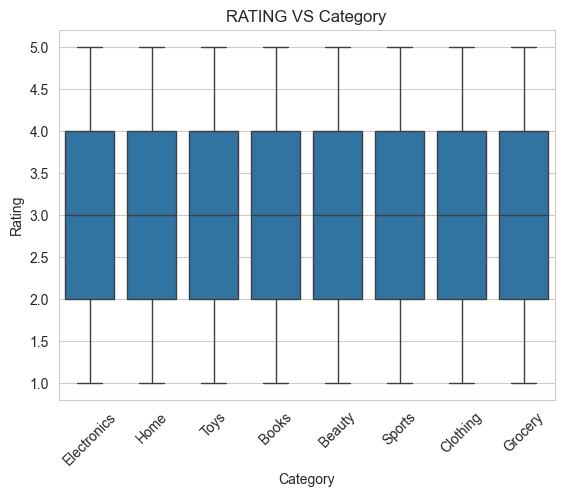

In [86]:
#RATING VS Category
plt.Figure(figsize=(10,8))
sns.boxplot(data=df,x='Category',y='Rating')
plt.xticks(rotation=45)
plt.title("RATING VS Category")
plt.show()

### **MULTIVARIATE ANALYSIS**

#CORRELATION MATRIX

In [87]:
df.columns

Index(['User_ID', 'Product_ID', 'Category', 'Rating', 'Timestamp',
       'User_Location', 'Product_Price', 'Company_Name', 'Device_Type',
       'Payment_Method', 'Delivery_Status', 'Review_Text'],
      dtype='object')

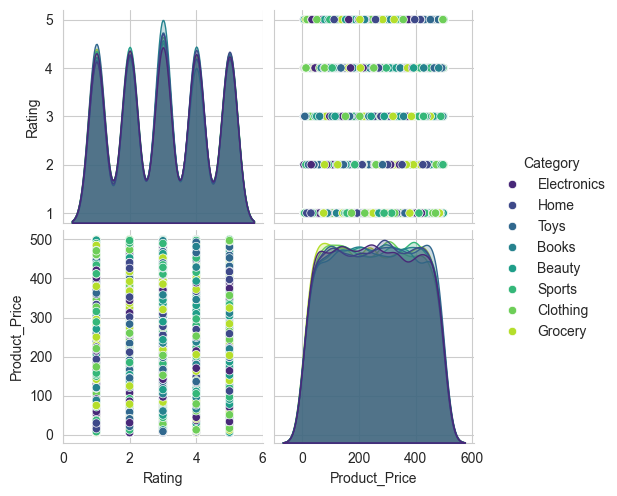

In [88]:
sns.pairplot(df,vars=['Rating','Product_Price'],hue='Category',palette='viridis')
plt.show()

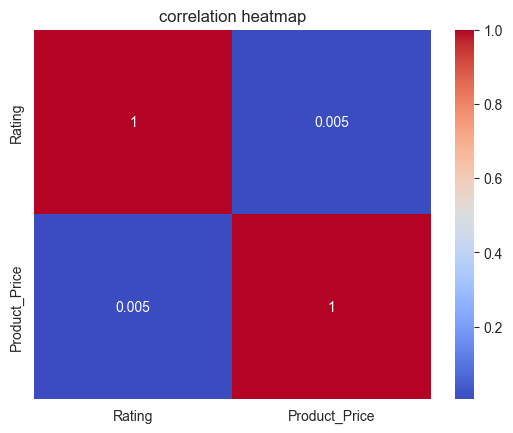

In [89]:
#corr
corr=df[['Rating','Product_Price']].corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.title('correlation heatmap')
plt.show()

In [90]:
#grouped per cat
grp_corr=df.groupby('Category')[['Rating','Product_Price']].corr().unstack()
print(grp_corr)

            Rating               Product_Price              
            Rating Product_Price        Rating Product_Price
Category                                                    
Beauty         1.0      0.016248      0.016248           1.0
Books          1.0      0.009621      0.009621           1.0
Clothing       1.0     -0.001713     -0.001713           1.0
Electronics    1.0      0.004057      0.004057           1.0
Grocery        1.0      0.014790      0.014790           1.0
Home           1.0     -0.017701     -0.017701           1.0
Sports         1.0      0.009079      0.009079           1.0
Toys           1.0      0.005955      0.005955           1.0


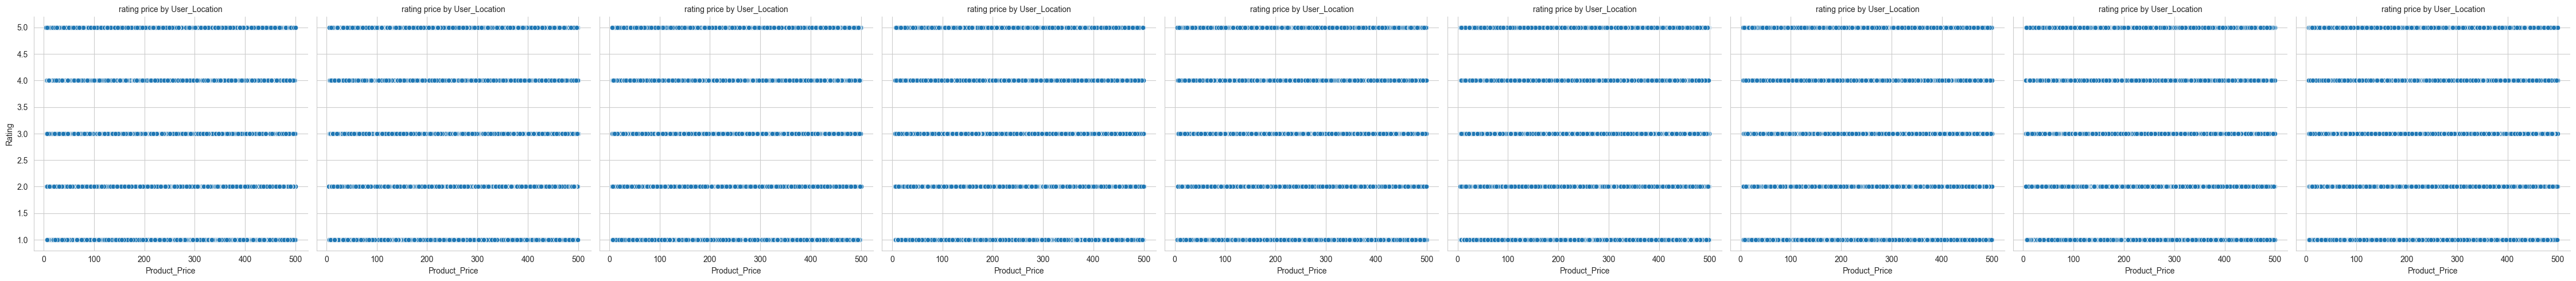

In [91]:
g=sns.relplot(x='Product_Price',y='Rating',col='User_Location',data=df,kind='scatter')
g.set_titles('rating price by User_Location')
plt.show()

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   User_ID          50000 non-null  object        
 1   Product_ID       50000 non-null  object        
 2   Category         50000 non-null  object        
 3   Rating           50000 non-null  float64       
 4   Timestamp        50000 non-null  datetime64[ns]
 5   User_Location    50000 non-null  object        
 6   Product_Price    50000 non-null  float64       
 7   Company_Name     50000 non-null  object        
 8   Device_Type      50000 non-null  object        
 9   Payment_Method   50000 non-null  object        
 10  Delivery_Status  50000 non-null  object        
 11  Review_Text      50000 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(9)
memory usage: 5.0+ MB


### FEATURE ENGINEERING

### ---------------------------------HANDLE CATEGORICAL(ENCODING)--------------------------------------

In [93]:
from sklearn.preprocessing import OneHotEncoder

In [94]:
df.columns

Index(['User_ID', 'Product_ID', 'Category', 'Rating', 'Timestamp',
       'User_Location', 'Product_Price', 'Company_Name', 'Device_Type',
       'Payment_Method', 'Delivery_Status', 'Review_Text'],
      dtype='object')

In [95]:
#check unique values
print(df[['Category','User_Location','Company_Name', 'Device_Type',
       'Payment_Method', 'Delivery_Status', 'Review_Text',]].nunique())

Category           8
User_Location      9
Company_Name       9
Device_Type        3
Payment_Method     6
Delivery_Status    4
Review_Text        7
dtype: int64


In [96]:
catt=['Category','User_Location','Company_Name', 'Device_Type',
       'Payment_Method', 'Delivery_Status']
encode_df=pd.get_dummies(df,columns=catt,drop_first=True)
encode_df.head(5)


,User_ID,Product_ID,Rating,Timestamp,Product_Price,Review_Text,Category_Books,Category_Clothing,Category_Electronics,Category_Grocery,...,Device_Type_Mobile,Device_Type_Tablet,Payment_Method_Credit Card,Payment_Method_Debit Card,Payment_Method_Net Banking,Payment_Method_Nopay,Payment_Method_UPI,Delivery_Status_Delivered,Delivery_Status_In Transit,Delivery_Status_Returned
0,U00655,P00058,3.0,2023-04-13,115.49,Poor packaging,False,False,True,False,...,False,True,False,False,False,False,False,True,False,False
1,U00433,P00017,1.0,2023-12-15,120.17,Not satisfied,False,False,True,False,...,False,True,False,True,False,False,False,False,False,True
2,U00460,P00302,1.0,2023-09-28,350.58,Excellent quality,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
3,U00105,P00048,1.0,2023-04-17,424.51,Value for money,False,False,False,False,...,True,False,False,False,True,False,False,True,False,False
4,U00081,P00283,5.0,2023-03-13,290.79,Good product,False,False,False,False,...,True,False,False,True,False,False,False,False,False,False


In [97]:
encode_df=encode_df.drop('Review_Text',axis=1,errors='ignore')
encode_df.head(5)
encode_df.columns

Index(['User_ID', 'Product_ID', 'Rating', 'Timestamp', 'Product_Price',
       'Category_Books', 'Category_Clothing', 'Category_Electronics',
       'Category_Grocery', 'Category_Home', 'Category_Sports', 'Category_Toys',
       'User_Location_Chicago', 'User_Location_Delhi', 'User_Location_Houston',
       'User_Location_Los Angeles', 'User_Location_Mumbai',
       'User_Location_New York', 'User_Location_Philadelphia',
       'User_Location_Phoenix', 'Company_Name_BestBuy',
       'Company_Name_BigBasket', 'Company_Name_Flipkart',
       'Company_Name_Myntra', 'Company_Name_Reliance Digital',
       'Company_Name_Snapdeal', 'Company_Name_Target', 'Company_Name_Walmart',
       'Device_Type_Mobile', 'Device_Type_Tablet',
       'Payment_Method_Credit Card', 'Payment_Method_Debit Card',
       'Payment_Method_Net Banking', 'Payment_Method_Nopay',
       'Payment_Method_UPI', 'Delivery_Status_Delivered',
       'Delivery_Status_In Transit', 'Delivery_Status_Returned'],
      dtype='obje

#### ------------------------------------------NUMERICAL FEATURES NORMALIZE---------------------------------------

In [98]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df[['Product_Price_Scaled','Rating_Scaled']]=scaler.fit_transform(df[['Product_Price','Rating']])


#### --------------------------------------------USER ITEM MATRIX-----------------------------------------------------

In [99]:
uim=df.pivot_table(index='User_ID',columns='Product_ID',values='Rating',fill_value=0)
print(uim.shape)
print(uim.head(3))

(1000, 500)
Product_ID  P00001  P00002  P00003  P00004  P00005  P00006  P00007  P00008  \
User_ID                                                                      
U00001         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
U00002         0.0     0.0     0.0     5.0     0.0     0.0     0.0     0.0   
U00003         0.0     0.0     5.0     0.0     0.0     0.0     0.0     0.0   

Product_ID  P00009  P00010  ...  P00491  P00492  P00493  P00494  P00495  \
User_ID                     ...                                           
U00001         0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0   
U00002         0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0   
U00003         0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0   

Product_ID  P00496  P00497  P00498  P00499  P00500  
User_ID                                             
U00001         0.0     0.0     0.0     0.0     0.0  
U00002         4.0     0.0     0.0     0.0     0.0  
U00003   

### ---------------------------------COLLABORATIVE FILTERING MODEL------------------------------------- 

In [100]:
from sklearn.metrics.pairwise import cosine_similarity
item_sim=cosine_similarity(uim.T)
user_sim=cosine_similarity(uim)


### ----------------------------------RECOMMENDATION FUNCTION-----------------------------------------

In [101]:
def get_top_similar_items(Product_ID,n=5):
    idx =list(uim.columns).index(Product_ID)
    sim_scores=item_sim[idx]
    similar_indices=np.argsort(sim_scores)[::-1][1:n+1]
    similar_pid=[uim.columns[i] for i in similar_indices]
    return similar_pid


In [102]:

print(get_top_similar_items(uim.columns[0],n=5))

['P00104', 'P00069', 'P00425', 'P00336', 'P00007']


### --------------------------------------------END OF THE PROJECT-----------------------------------------